In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import pandas as pd
from os import listdir
from os.path import isfile, join, exists
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import seaborn as sns

import misc_functions as f
from misc_functions import player_dist
from misc_functions import draw_half_court

In [43]:
##Look at back-to-back possessions by the warriors to visualize how midranges affect defense

df=pd.read_csv('data/converted/0021500438_converted.csv')##Read in the tracking data


In [44]:
f.add_names(df)

In [45]:
# Boolean mask used to grab the data within the proper time period
time_mask = (df.game_clock<=679) & (df.game_clock>=672.79) & \
            (df.quarter==2)
time_df = df[time_mask]

time=np.sort(time_df.shot_clock.unique())
time_descending=time[::-1]


# Boolean mask to get the players we want
player_mask = (time_df.player_name=="Matthew Dellavedova") | \
              (time_df.player_name=="Shaun Livingston") | \
              (time_df.player_name=="Mo Williams") | \
              (time_df.player_name=="Tristian Thompson") | \
              (time_df.player_name=="Festus Ezeli") | \
              (time_df.player_name=="Leandro Barbosa")

# Group by players and get their locations
group1 = time_df[player_mask].groupby('player_name')[["x_loc", "y_loc"]]

# Get the differences in distances that we want
Della_Livi = player_dist(group1.get_group("Matthew Dellavedova"),
                            group1.get_group("Shaun Livingston"))[0:len(time_descending)]##Only take these values
Williams_Livi = player_dist(group1.get_group("Shaun Livingston"),##to isolate necessary data
                            group1.get_group("Mo Williams"))[0:len(time_descending)]
Williams_Barbosa = player_dist(group1.get_group("Mo Williams"),
                            group1.get_group("Leandro Barbosa"))[0:len(time_descending)]


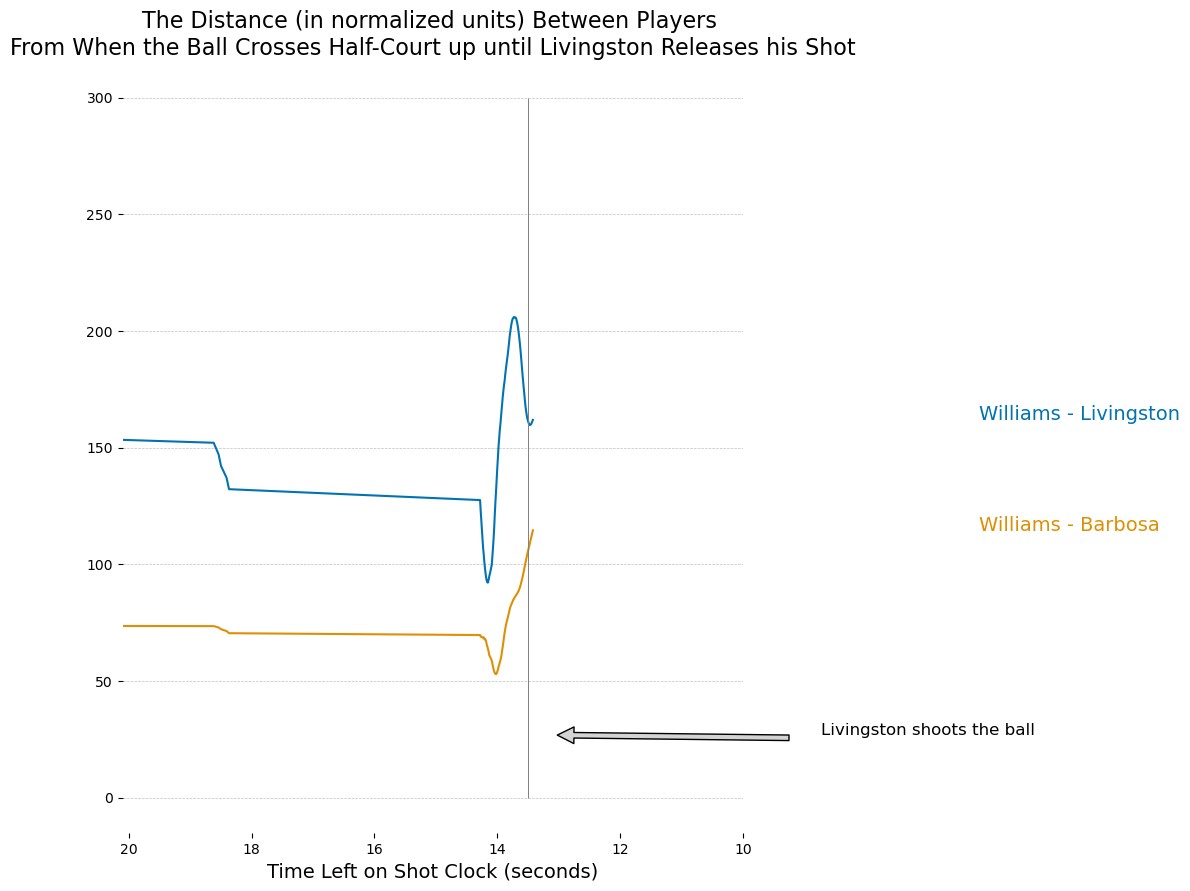

In [46]:
# Create some lists that will help create our plot
# Distance data
distances = [Williams_Livi, Williams_Barbosa]
# Labels for each line that we will plopt
labels = [ "Williams - Livingston", "Williams - Barbosa"]
# Colors for each line
colors = sns.color_palette('colorblind', 4)

plt.figure(figsize=(8,10))
# Use enumerate to index the labels and colors and match
# them with the proper distance data
for i, dist in enumerate(distances):
    plt.plot(time_descending, dist, color=colors[i])
    
    y_pos = dist[-1]
    
    plt.text(6.15, y_pos, labels[i], fontsize=14, color=colors[i])
    
# Create horizontal grid lines
plt.grid(axis='y',color='gray', linestyle='--', lw=0.5, alpha=0.5)

plt.xlim(20.1, 10)

plt.title("The Distance (in normalized units) Between Players \nFrom When the Ball"
          " Crosses Half-Court up until Livingston Releases his Shot", size=16)
plt.xlabel("Time Left on Shot Clock (seconds)", size=14)

# Plot a line to indicate when Livingston shoots the ball
plt.vlines(13.5, 0, 300, color='gray', lw=0.7)
plt.annotate("Livingston shoots the ball", (13.5, 27), 
             xytext=(8.725, 26.8), fontsize=12, 
             arrowprops=dict(facecolor='lightgray', shrink=0.10))

# Get rid of unneeded chart lines
sns.despine(left=True, bottom=True) 

plt.show()
##Here we can see the way Mo Williams cheats off his man towards Livingston

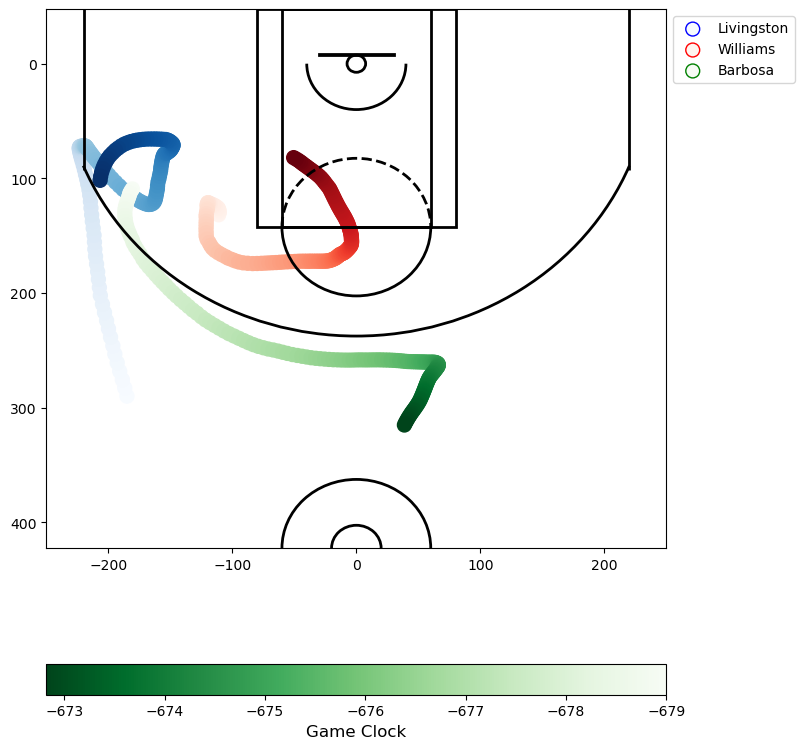

In [47]:
##Player movements on the play
livingston_play = time_df.loc[(time_df['player_name']=="Shaun Livingston") & (time_df['event_id']==140)]
williams_play = time_df.loc[(time_df['player_name']=="Mo Williams") & (time_df['event_id']==140)]
barbosa_play = time_df.loc[(time_df['player_name']=="Leandro Barbosa") & (time_df['event_id']==140)]
plt.figure(figsize=(8, 10))
ax=plt.gca()
# Plot the movemnts as scatter plot
# using a colormap to show change in game clock
plt.scatter(livingston_play.x_loc, livingston_play.y_loc, c=-livingston_play.game_clock,
            cmap=plt.cm.Blues, s=100, zorder=1, label='Livingston')
plt.scatter(williams_play.x_loc, williams_play.y_loc, c=-williams_play.game_clock,
            cmap=plt.cm.Reds, s=100, zorder=1, label='Williams')
plt.scatter(barbosa_play.x_loc, barbosa_play.y_loc, c=-barbosa_play.game_clock,
            cmap=plt.cm.Greens, s=100, zorder=1, label='Barbosa')

# Darker colors represent moments earlier on in the game
cbar = plt.colorbar(orientation="horizontal")
# invert the colorbar to have higher numbers on the left
cbar.ax.invert_xaxis()
cbar.set_label('Game Clock', fontsize=12)
draw_half_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)

legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

leg = ax.get_legend()
leg.legend_handles[0].set_color('blue')
leg.legend_handles[1].set_color('red')
leg.legend_handles[2].set_color('Green')
plt.show()


In [50]:
# Boolean mask used to grab the data within the proper time period
time_mask2 = (df.game_clock<=648) & (df.game_clock>=638.24) & \
            (df.quarter==2)
time_df2 = df[time_mask2]

time2=np.sort(time_df2.shot_clock.unique())
time_descending2=time2[::-1]


# Boolean mask to get the players we want
player_mask2 = (time_df2.player_name=="Matthew Dellavedova") | \
              (time_df2.player_name=="Shaun Livingston") | \
              (time_df2.player_name=="Mo Williams") | \
              (time_df2.player_name=="Andre Iguodala") | \
              (time_df2.player_name=="Iman Shumpert") | \
              (time_df2.player_name=="Leandro Barbosa")

# Group by players and get their locations
group2 = time_df2[player_mask2].groupby('player_name')[["x_loc", "y_loc"]]

# Get the differences in distances that we want
Shump_Livi = player_dist(group2.get_group("Iman Shumpert"),
                            group2.get_group("Shaun Livingston"))[0:len(time_descending2)]
Shump_Iggy = player_dist(group2.get_group("Iman Shumpert"),
                            group2.get_group("Andre Iguodala"))[0:len(time_descending2)]
Williams_Livi2 = player_dist(group2.get_group("Mo Williams"),
                            group2.get_group("Shaun Livingston"))[0:len(time_descending2)]

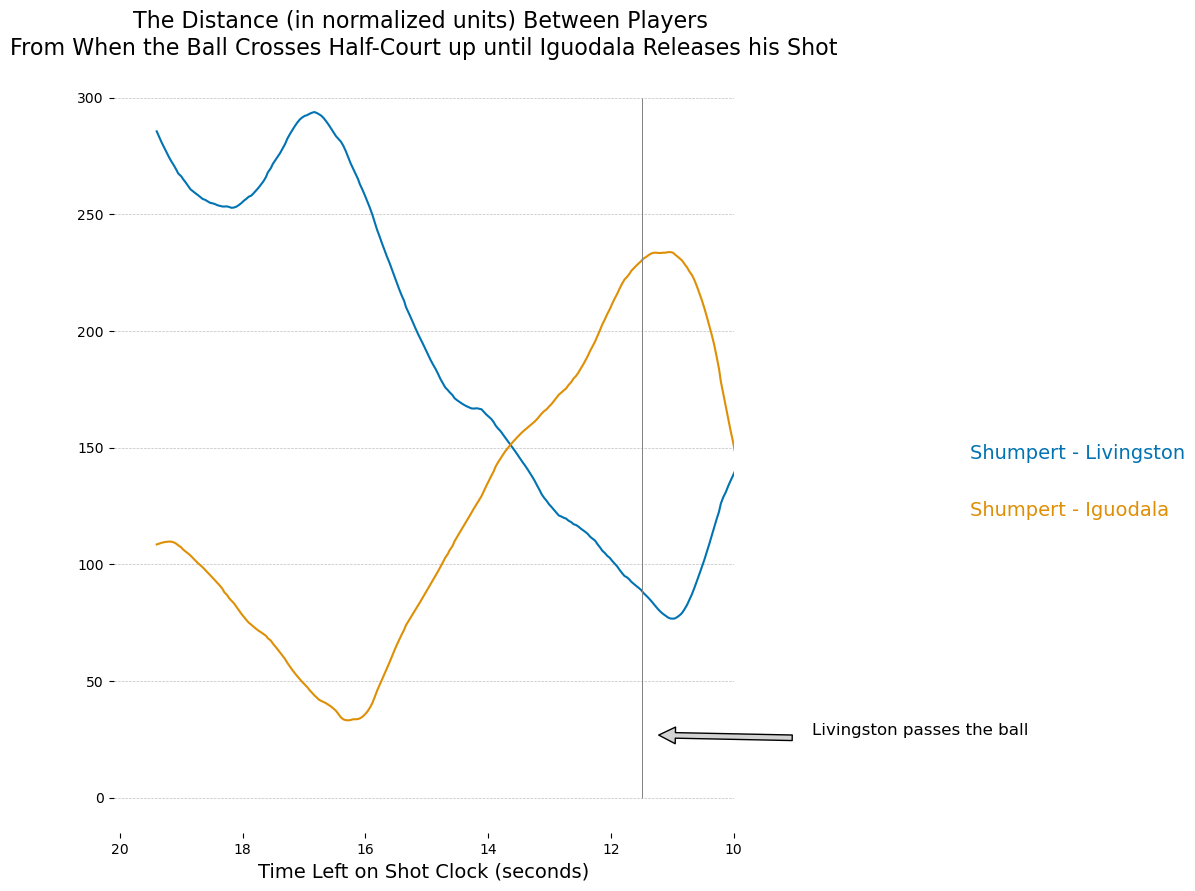

In [51]:
# Create some lists that will help create our plot
# Distance data
distances = [Shump_Livi, Shump_Iggy]

# Labels for each line that we will plopt
labels = ["Shumpert - Livingston", "Shumpert - Iguodala"]
# Colors for each line
colors = sns.color_palette('colorblind', 4)

plt.figure(figsize=(8,10))
# Use enumerate to index the labels and colors and match
# them with the proper distance data
for i, dist in enumerate(distances):
    plt.plot(time_descending2, dist, color=colors[i])
    
    y_pos = dist[-1]
    
    plt.text(6.15, y_pos, labels[i], fontsize=14, color=colors[i])
    
# Create horizontal grid lines
plt.grid(axis='y',color='gray', linestyle='--', lw=0.5, alpha=0.5)

plt.xlim(20.1, 10)

plt.title("The Distance (in normalized units) Between Players \nFrom When the Ball"
          " Crosses Half-Court up until Iguodala Releases his Shot", size=16)
plt.xlabel("Time Left on Shot Clock (seconds)", size=14)

# Plot a line to indicate when Livingston passes the ball
plt.vlines(11.5, 0, 300, color='gray', lw=0.7)
plt.annotate("Livingston passes the ball", (11.5, 27), 
             xytext=(8.725, 26.8), fontsize=12, 
             arrowprops=dict(facecolor='lightgray', shrink=0.10))

# Get rid of unneeded chart lines
sns.despine(left=True, bottom=True) 

plt.show()
##Here we can see the way Iman Shumpert cheats off of his man towards Livingston, even though Mo Williams has him covered
##leaving Iggy open for a 3 which he capatlizes on by cashing from behind the arc
##Shot takes place with ~9 seconds left on shot clock


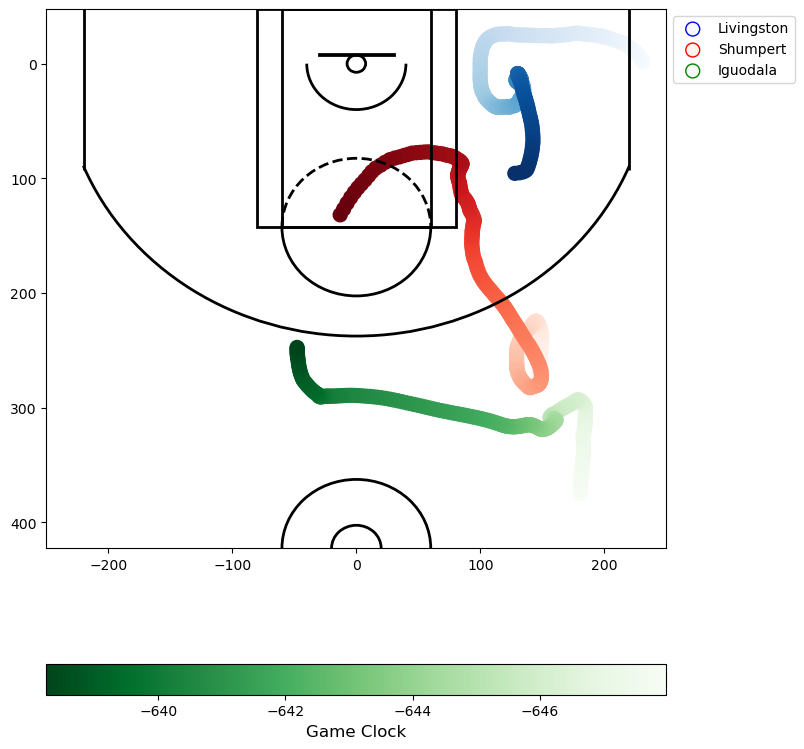

In [54]:
##Player movements on the play
livingston_play2 = time_df2.loc[(time_df2['player_name']=="Shaun Livingston") & (time_df2['event_id']==144)]
shumpert_play = time_df2.loc[(time_df2['player_name']=="Iman Shumpert") & (time_df2['event_id']==144)]
Iguodala_play = time_df2.loc[(time_df2['player_name']=="Andre Iguodala") & (time_df2['event_id']==144)]

plt.figure(figsize=(8, 10))
ax = plt.gca()

# Plot the movemnts as scatter plot
# using a colormap to show change in game clock
plt.scatter(livingston_play2.x_loc, livingston_play2.y_loc, c=-livingston_play2.game_clock,
            cmap=plt.cm.Blues, s=100, zorder=1, label='Livingston')
plt.scatter(shumpert_play.x_loc, shumpert_play.y_loc, c=-shumpert_play.game_clock,
            cmap=plt.cm.Reds, s=100, zorder=1, label='Shumpert')
plt.scatter(Iguodala_play.x_loc, Iguodala_play.y_loc, c=-Iguodala_play.game_clock,
            cmap=plt.cm.Greens, s=100, zorder=1, label='Iguodala')
# Darker colors represent moments earlier on in the game
cbar = plt.colorbar(orientation="horizontal")
# invert the colorbar to have higher numbers on the left
cbar.ax.invert_xaxis()
cbar.set_label('Game Clock', fontsize=12)
draw_half_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)


legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

leg = ax.get_legend()
leg.legend_handles[0].set_color('blue')
leg.legend_handles[1].set_color('red')
leg.legend_handles[2].set_color('Green')
plt.show()


In [ ]:
##These two plays by the warriors provide an excellent example for the applications of midrange shots.
##Using the tracking data to look at distances between players is not fully intuitive,
##but provides a good snapshot of how the defense is stretching/shrinking on a play.